In [2]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


            PC1           PC2           PC3           PC4           PC5  \
0 -1.654606e+00 -2.698003e-01  1.573014e-02 -2.102338e-02 -1.089160e-01   
1 -9.220886e-01  1.034332e-01 -3.179193e-02 -2.619735e-01 -1.090599e-01   
2 -6.722380e-01 -9.923317e-02 -7.105019e-02 -1.609346e-01 -1.213459e-01   
3 -1.630786e+00 -2.306404e-01 -4.411658e-02 -2.477653e-02 -2.057922e-02   
4 -2.007806e-16  3.367921e-16 -9.384577e-17  1.152639e-16  1.687790e-18   

               Country  
0          Afghanistan  
1              Albania  
2              Algeria  
3               Angola  
4  Antigua and Barbuda  


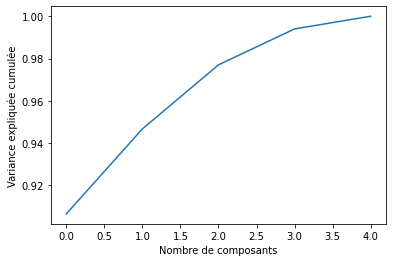

In [3]:
# Load the dataset
df = pd.read_csv('countries.csv', encoding='iso-8859-1', usecols=['Country', 'Carbon Footprint', 'Cropland Footprint', 'Grazing Footprint', 'Forest Footprint', 'Fish Footprint'])

le = LabelEncoder()

# fit the encoder to the country names and transform the names into labels
labels = le.fit_transform(df['Country'].values)

# Replace null values
df = df.fillna(df.mean())

# Drop the 'Country' column
df_without_country = df.drop('Country', axis=1)

# Fit PCA to the transformed data
pca = PCA().fit(df_without_country)

# Transform the data
transformed_data = pca.transform(df_without_country)

# Add the 'Country' column back to the transformed data
transformed_df = pd.DataFrame(transformed_data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
transformed_df['Country'] = df['Country'].values

# Print the transformed data
print(transformed_df.head())


# Tracer la variance expliquée par chaque composant principal
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de composants')
plt.ylabel('Variance expliquée cumulée')
plt.show()

In [4]:
features = ['Carbon Footprint','Cropland Footprint', 'Grazing Footprint','Forest Footprint','Fish Footprint']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['Country']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [5]:
pca = PCA(n_components=4)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])

In [6]:
finalDf = pd.concat([principalDf, df[['Country']]], axis = 1)

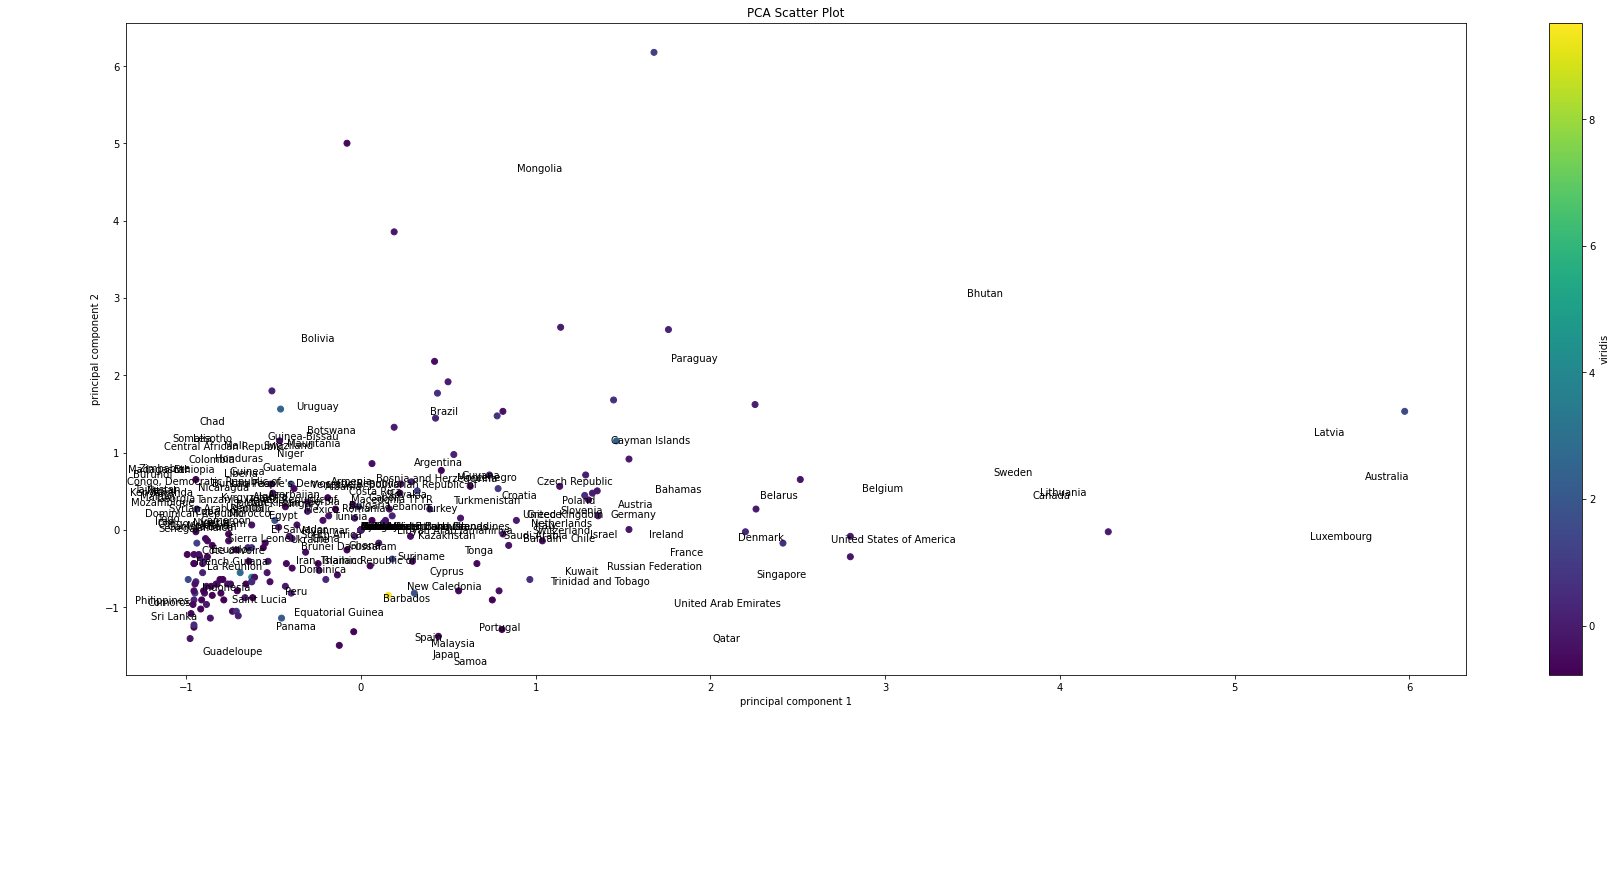

In [7]:
fig, ax = plt.subplots(figsize=(30,12))
scatter =ax.scatter(x[:, 0], x[:, 1], c=x[:, 2], cmap='viridis')
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_title('PCA Scatter Plot')
# Add labels with values to each point
for i, txt in enumerate(finalDf['Country']):
    ax.annotate(txt, (finalDf['principal component 1'][i], finalDf['principal component 2'][i]))
# add colorbar next to the plot
cbar = fig.colorbar(scatter)
cbar.ax.set_ylabel('viridis')
plt.show()

<AxesSubplot:>

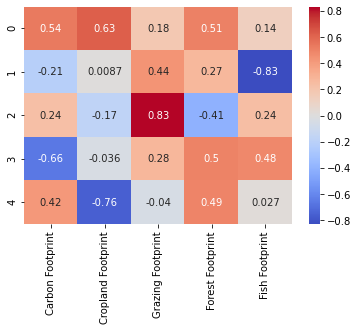

In [8]:
# Convert input data to DataFrame
df = pd.DataFrame(x, columns=['Carbon Footprint','Cropland Footprint', 'Grazing Footprint','Forest Footprint','Fish Footprint'])

# Fit PCA
pca = PCA()
pca.fit(x)

# Create correlation matrix and plot heatmap
correlation_matrix = pd.DataFrame(pca.components_, columns=df.columns)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')





C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


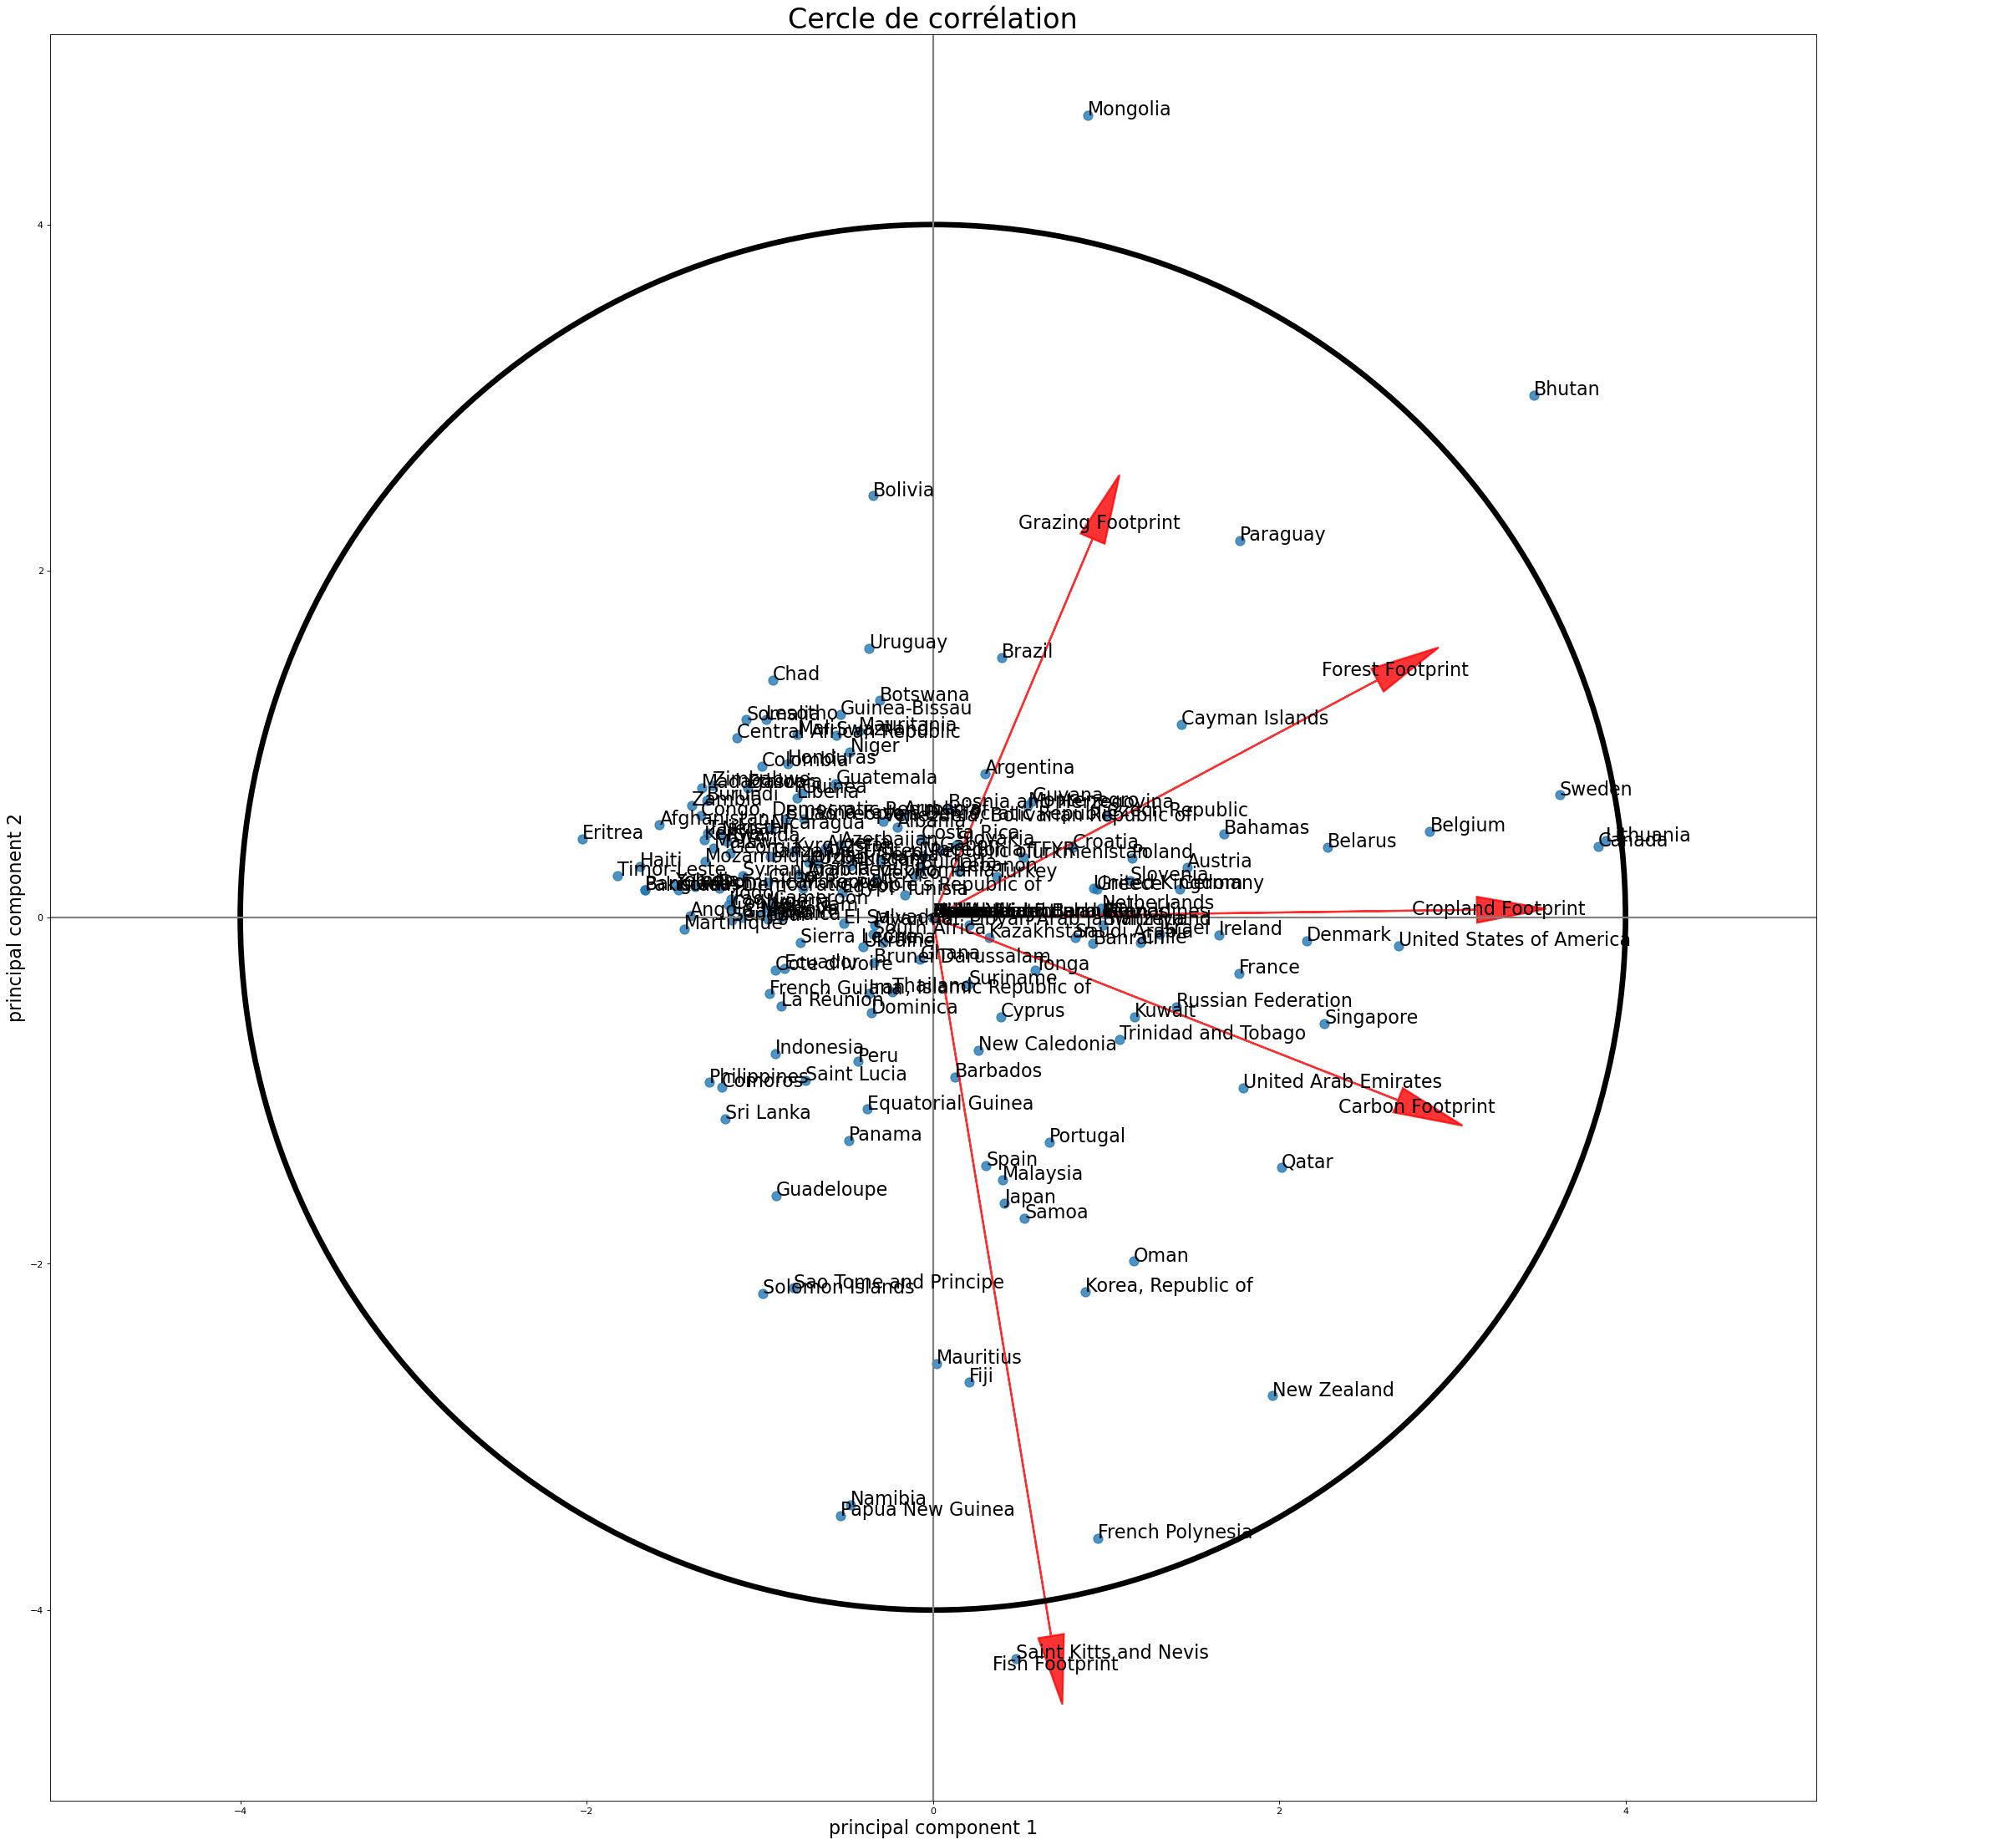

In [36]:
fig = plt.figure(figsize=(35, 35), dpi=80)

ax = fig.add_subplot(111)
ax.set_xlim(-5.1,5.1)  # slightly increase the limit to make room for larger circle
ax.set_ylim(-5.1,5.1)
ax.set_aspect('equal')  # Add this line to set the aspect ratio to be equal
ax.axhline(0, color='gray', linewidth=2)
ax.axvline(0, color='gray', linewidth=2)

# Increase arrow head size and arrow line width
for i, v in enumerate(pca.components_.T):
    ax.arrow(0, 0, v[0]*5, v[1]*5, head_width=0.15, head_length=0.4, color='red', alpha=0.8, lw=2)
    ax.text(v[0]* 5.2, v[1] * 5.2, df.columns[i], color='black', ha='center', va='center', fontsize=20)

plt.xlabel('principal component 1', fontsize=20)  # Increase font size of axis labels
plt.ylabel('principal component 2', fontsize=20)
plt.title('Cercle de corrélation', fontsize=30)

# Decrease circle radius and increase line width
circle = plt.Circle((0, 0), radius=4, fill=False, edgecolor='black', linewidth=6)
ax.add_artist(circle)

# Increase marker size and font size
indiv = pca.transform(df)
ax.scatter(indiv[:, 0], indiv[:, 1], alpha=0.8, s=100)
for i, txt in enumerate(finalDf['Country']):
    ax.annotate(txt, (finalDf['principal component 1'][i], finalDf['principal component 2'][i]), fontsize=20)
plt.show()
